In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

In [3]:
# load a numpy record array from yahoo csv data with fields date, open, close,
# volume, adj_close from the mpl-data/example directory, the record array
# stores the date as an np.datetime64 with a day unit ('D') in the date column
price_data = (cbook.get_sample_data("goog.npz", np_load=True)["price_data"].view(np.recarray))
price_data = price_data[-250:] # get the most recent 250 trading days

In [4]:
delta_1 = np.diff(price_data.adj_close) / price_data.adj_close[:-1]

# marker size in units of points^2
volume = (15 * price_data.volume[:-2] / price_data.volume[0]) ** 2
close = 0.003 * price_data.close[:-2] / 0.003 * price_data.open[:-2]

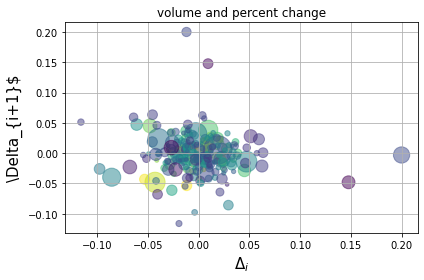

In [5]:
fig, ax = plt.subplots()

ax.scatter(delta_1[:-1], delta_1[1:], c=close, s=volume, alpha=0.5)
ax.set_xlabel(r"$\Delta_i$", fontsize=15)
ax.set_ylabel(r"\Delta_{i+1}$", fontsize=15)
ax.set_title("volume and percent change")

ax.grid(True)
fig.tight_layout()
plt.show()